In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url)
n = 0
for i in tables:
    a = i.head(0)
    # print(f"{n} --> {a}")
    n += 1
    
#нам потрібна таблиця з індеком 12

In [3]:
df = tables[12]
df

Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13       Миколаївська  211.0  194.0  155.0   137    80   115  112   71
14            Одеська  241.0  192.0  148.0   126    80   127  123   88
15         Полтавська  186.0  163.0  131.0   118    70    99  100   65
16         Рівненська  269.0  267.0  193.0   158   118   159  148  107
17            Сумська  216.0  184.0  132.0   115    70    97   92   60
18      Тернопільська  213.0  216.0  157.0   142    92   113  109   76
19         Харківська  197.0  173.0  140.0   114    68    99  101   68
20         Херсонська  208.0  214.0  166.0   143    85   117  115   81
21        Хмельницька  234.0  198.0  148.0   129    85   113  112   79
22          Черкаська  205.0  179.0  144.0   123    75   100   98   64
23        Чернівецька  247.0  218.0  170.0   148   101   128  129   92
24       Чернігівська  220.0  183.0  127.0   108    69    94   90   61
25               Київ    NaN  174.0  159.0   120    73   120  121  110
26        Севастополь    NaN    NaN    NaN   125    70   120    —    —
27            Україна  228.0  205.0  152.0   126    78   114  111   81

Вивести перші рядки таблиці за допомогою методу head


In [4]:
a = df.head()
print(a)

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)


In [5]:
shape = df.shape
shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN


In [6]:
df = df.replace('—', np.nan)#використовуємо функцію replace()
df

Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13       Миколаївська  211.0  194.0  155.0   137    80   115  112   71
14            Одеська  241.0  192.0  148.0   126    80   127  123   88
15         Полтавська  186.0  163.0  131.0   118    70    99  100   65
16         Рівненська  269.0  267.0  193.0   158   118   159  148  107
17            Сумська  216.0  184.0  132.0   115    70    97   92   60
18      Тернопільська  213.0  216.0  157.0   142    92   113  109   76
19         Харківська  197.0  173.0  140.0   114    68    99  101   68
20         Херсонська  208.0  214.0  166.0   143    85   117  115   81
21        Хмельницька  234.0  198.0  148.0   129    85   113  112   79
22          Черкаська  205.0  179.0  144.0   123    75   100   98   64
23        Чернівецька  247.0  218.0  170.0   148   101   128  129   92
24       Чернігівська  220.0  183.0  127.0   108    69    94   90   61
25               Київ    NaN  174.0  159.0   120    73   120  121  110
26        Севастополь    NaN    NaN    NaN   125    70   120  NaN  NaN
27            Україна  228.0  205.0  152.0   126    78   114  111   81

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
type_df = df.dtypes
type_df

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [8]:
for column in df.columns[1:]: 
    df[column] = pd.to_numeric(df[column], errors='coerce')
type_df = df.dtypes
type_df

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

Частка пропусків у кожній колонці:
 1950    0.071429
1960    0.035714
1970    0.035714
1990    0.000000
2000    0.000000
2012    0.000000
2014    0.071429
2019    0.142857
dtype: float64


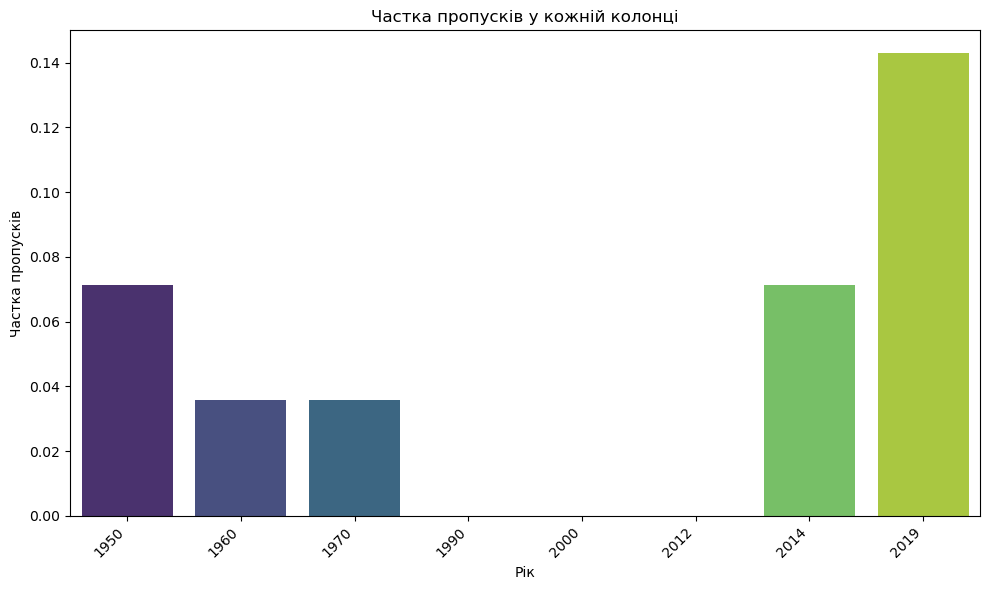

In [9]:
missing_counts = df.isnull().sum()
total_rows = len(df)
level = missing_counts / total_rows
print("Частка пропусків у кожній колонці:\n", level[1:])

missing_df = level.reset_index()
missing_df.columns = ['Column', 'Missing Fraction']
missing_df = missing_df[missing_df['Column'] != 'Регіон']

    # Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Fraction', data=missing_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Частка пропусків у кожній колонці')
plt.xlabel('Рік')
plt.ylabel('Частка пропусків')
plt.tight_layout()
plt.show()

Видаліть з таблиці дані по всій країні, останній рядок таблиці


In [10]:
df = df.drop(df.index[-1])
df

Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119.0   87.0
13       Миколаївська  211.0  194.0  155.0   137    80   115  112.0   71.0
14            Одеська  241.0  192.0  148.0   126    80   127  123.0   88.0
15         Полтавська  186.0  163.0  131.0   118    70    99  100.0   65.0
16         Рівненська  269.0  267.0  193.0   158   118   159  148.0  107.0
17            Сумська  216.0  184.0  132.0   115    70    97   92.0   60.0
18      Тернопільська  213.0  216.0  157.0   142    92   113  109.0   76.0
19         Харківська  197.0  173.0  140.0   114    68    99  101.0   68.0
20         Херсонська  208.0  214.0  166.0   143    85   117  115.0   81.0
21        Хмельницька  234.0  198.0  148.0   129    85   113  112.0   79.0
22          Черкаська  205.0  179.0  144.0   123    75   100   98.0   64.0
23        Чернівецька  247.0  218.0  170.0   148   101   128  129.0   92.0
24       Чернігівська  220.0  183.0  127.0   108    69    94   90.0   61.0
25               Київ    NaN  174.0  159.0   120    73   120  121.0  110.0
26        Севастополь    NaN    NaN    NaN   125    70   120    NaN    NaN

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [11]:
df.head()
average_1950 = df["1950"].mean()
average_1960 = df["1960"].mean()
average_1970 = df["1970"].mean()
average_1990 = df["1990"].mean()
average_2000 = df["2000"].mean()
average_2012 = df["2012"].mean()
average_2014 = df["2014"].mean()
average_2019 = df["2019"].mean()

df["1950"] = df["1950"].fillna(average_1950)
df["1960"] = df["1960"].fillna(average_1960)
df["1970"] = df["1970"].fillna(average_1970)
df["1990"] = df["1990"].fillna(average_1990)
df["2000"] = df["2000"].fillna(average_2000)
df["2012"] = df["2012"].fillna(average_2012)
df["2014"] = df["2014"].fillna(average_2014)
df["2019"] = df["2019"].fillna(average_2019)

df

Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    96   51.00   
12          Львівська  234.00  240.000000  171.0   140    91   119  119.00   
13       Миколаївська  211.00  194.000000  155.0   137    80   115  112.00   
14            Одеська  241.00  192.000000  148.0   126    80   127  123.00   
15         Полтавська  186.00  163.000000  131.0   118    70    99  100.00   
16         Рівненська  269.00  267.000000  193.0   158   118   159  148.00   
17            Сумська  216.00  184.000000  132.0   115    70    97   92.00   
18      Тернопільська  213.00  216.000000  157.0   142    92   113  109.00   
19         Харківська  197.00  173.000000  140.0   114    68    99  101.00   
20         Херсонська  208.00  214.000000  166.0   143    85   117  115.00   
21        Хмельницька  234.00  198.000000  148.0   129    85   113  112.00   
22          Черкаська  205.00  179.000000  144.0   123    75   100   98.00   
23        Чернівецька  247.00  218.000000  170.0   148   101   128  129.00   
24       Чернігівська  220.00  183.000000  127.0   108    69    94   90.00   
25               Київ  231.04  174.000000  159.0   120    73   120  121.00   
26        Севастополь  231.04  207.576923  156.0   125    70   120  111.44   

          2019  
0    80.173913  
1    76.000000  
2   101.000000  
3    71.000000  
4    80.173913  
5    79.000000  
6   104.000000  
7    68.000000  
8    88.000000  
9    80.000000  
10   68.000000  
11   80.173913  
12   87.000000  
13   71.000000  
14   88.000000  
15   65.000000  
16  107.000000  
17   60.000000  
18   76.000000  
19   68.000000  
20   81.000000  
21   79.000000  
22   64.000000  
23   92.000000  
24   61.000000  
25  110.000000  
26   80.173913

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [12]:
level = df["2019"].mean()
print("Середній рівень народжуваності у 2019 ---> ", level)
regions_above_average = df[df["2019"] > level][["Регіон", "2019"]]
print("Cписок регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
for index, row in regions_above_average.iterrows():
    print("-", row["Регіон"], row["2019"])
    


Середній рівень народжуваності у 2019 --->  80.17391304347828
Cписок регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:
- Волинська 101.0
- Закарпатська 104.0
- Івано-Франківська 88.0
- Львівська 87.0
- Одеська 88.0
- Рівненська 107.0
- Херсонська 81.0
- Чернівецька 92.0
- Київ 110.0


У якому регіоні була найвища народжуваність у 2014 році?


In [13]:
max_region_2019 = df.loc[df["2019"].idxmax()]

print("Регіон з найвищою народжуваністю у 2019 році -", max_region_2019["Регіон"],",", max_region_2019["2019"])

Регіон з найвищою народжуваністю у 2019 році - Київ , 110.0


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

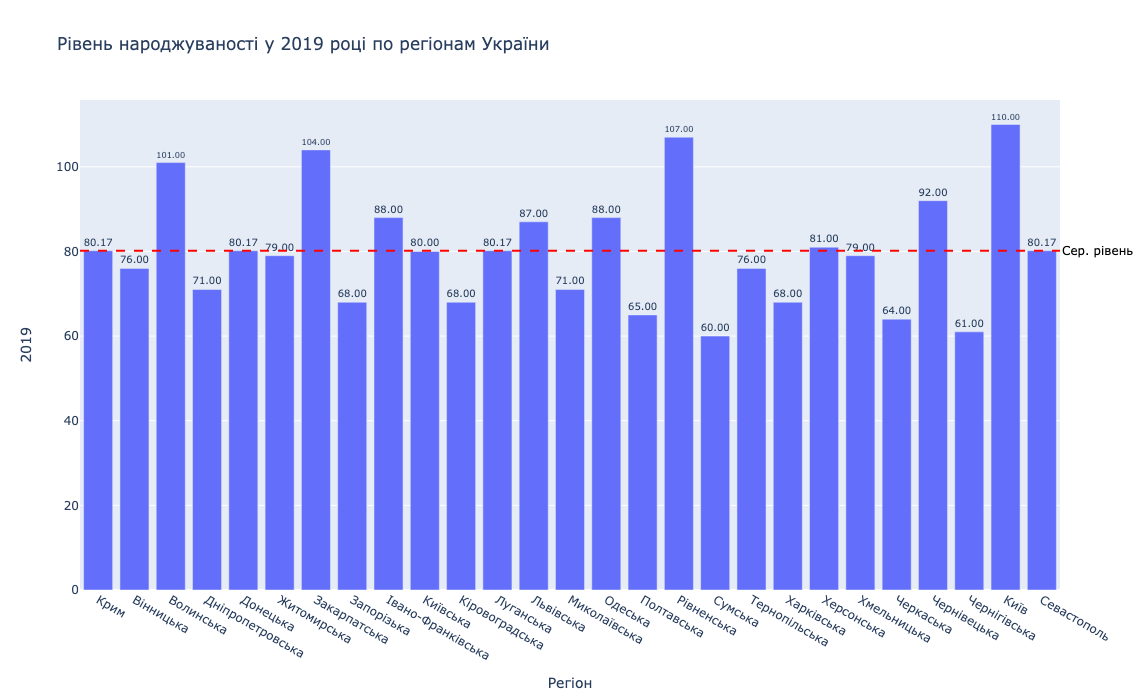

In [14]:
fig = px.bar(df, x="Регіон", y="2019", title="Рівень народжуваності у 2019 році по регіонам України", text = "2019", width=1200, height=700)
fig.add_hline(y=level, line_dash="dash", line_color="red", annotation_text="Сер. рівень", annotation_position="right", annotation_font_color="black")
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

Додати графік

In [15]:
df.head()

Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913

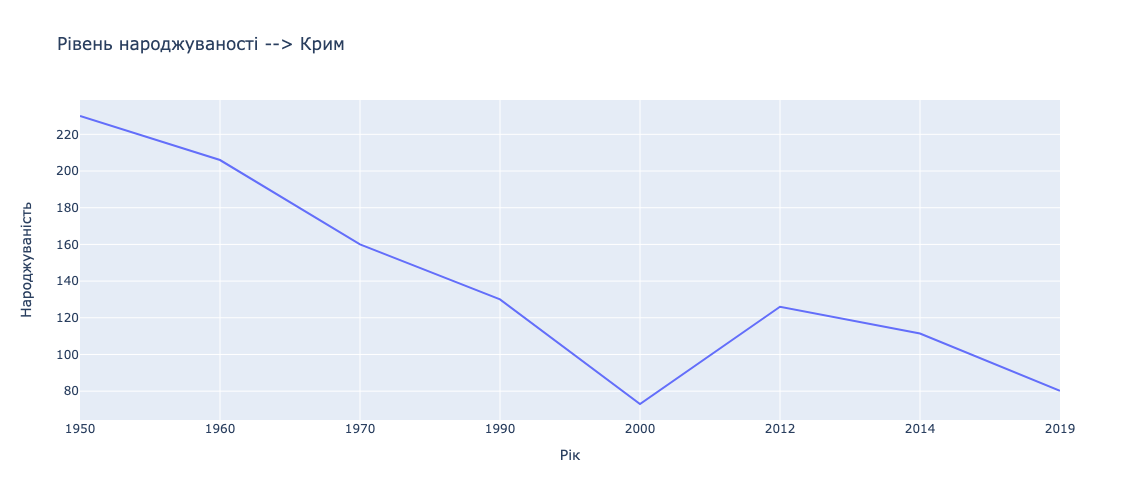

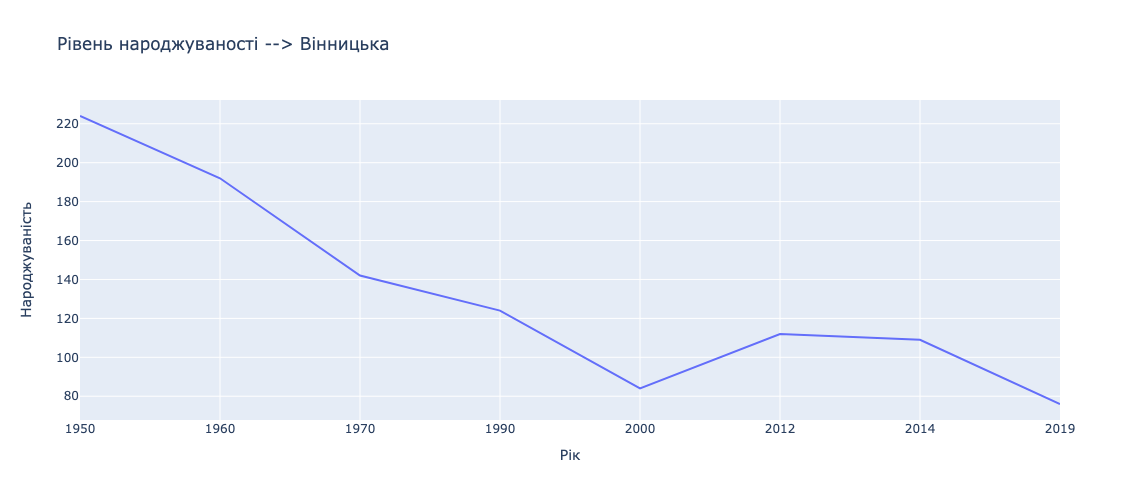

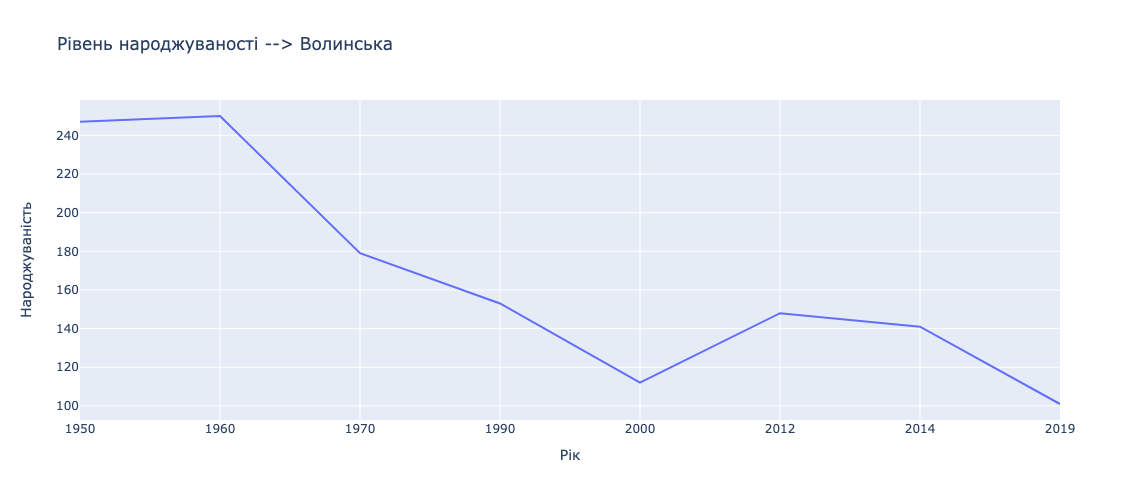

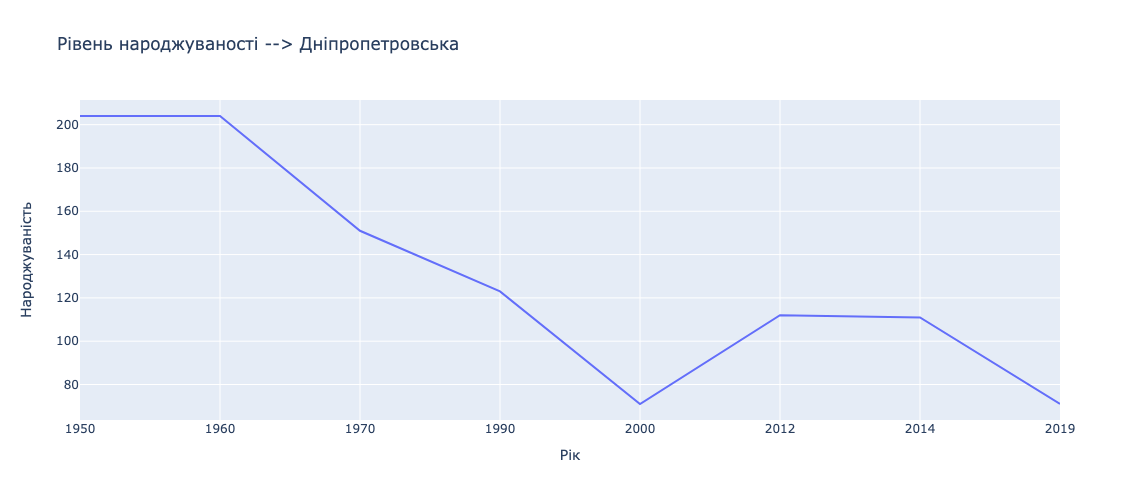

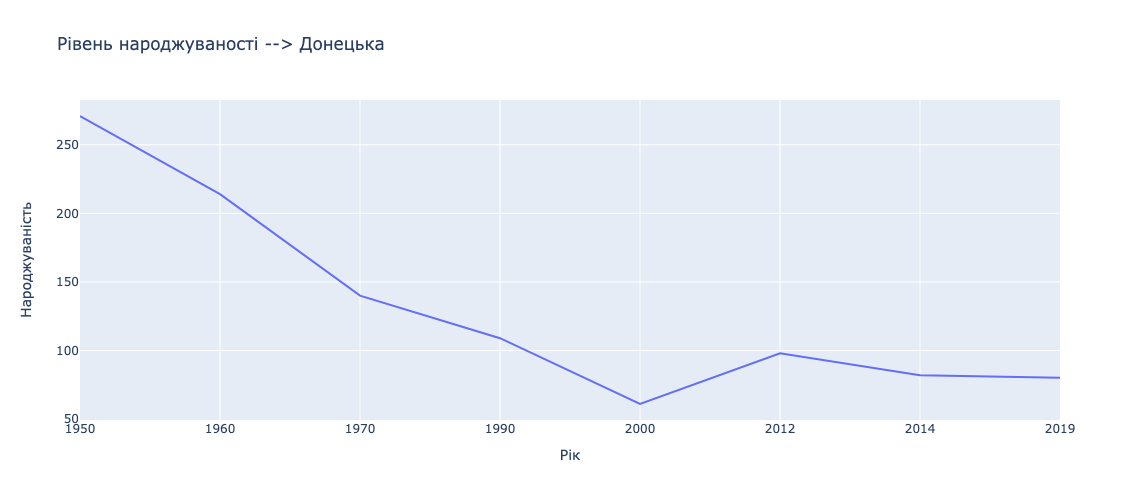

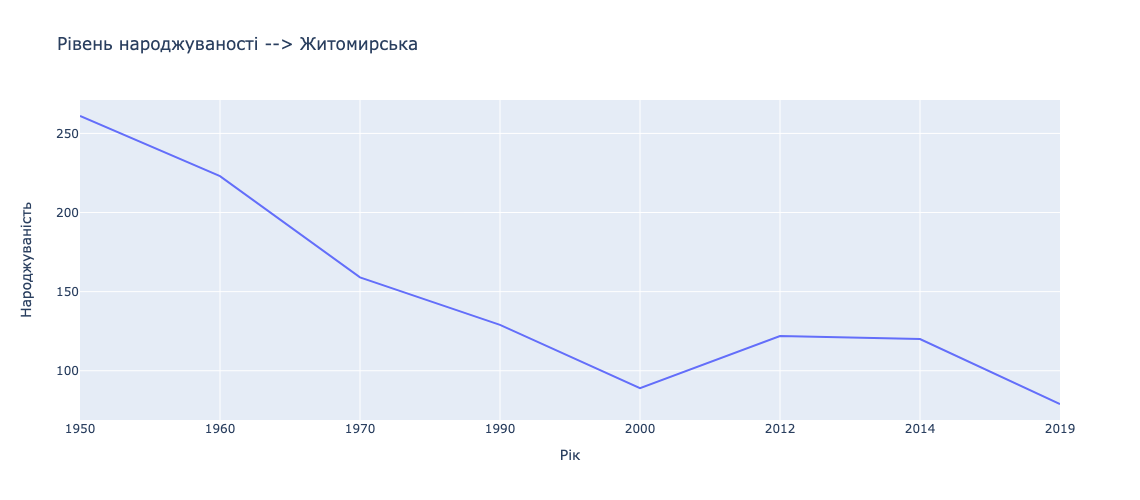

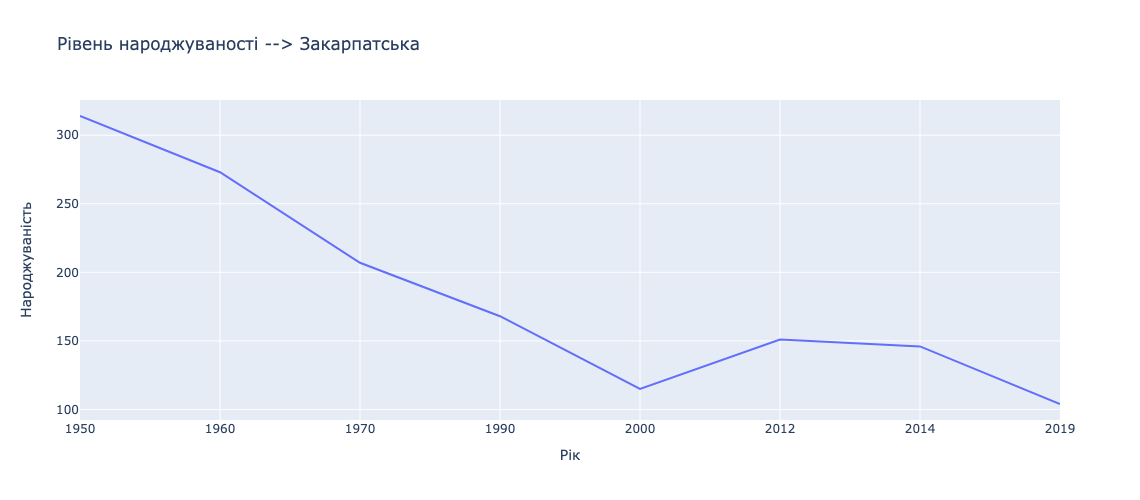

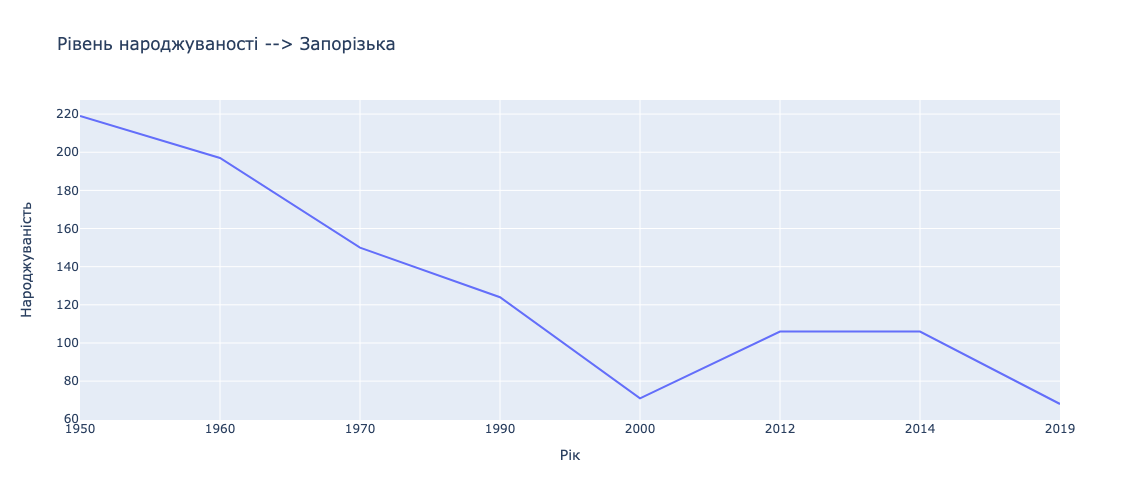

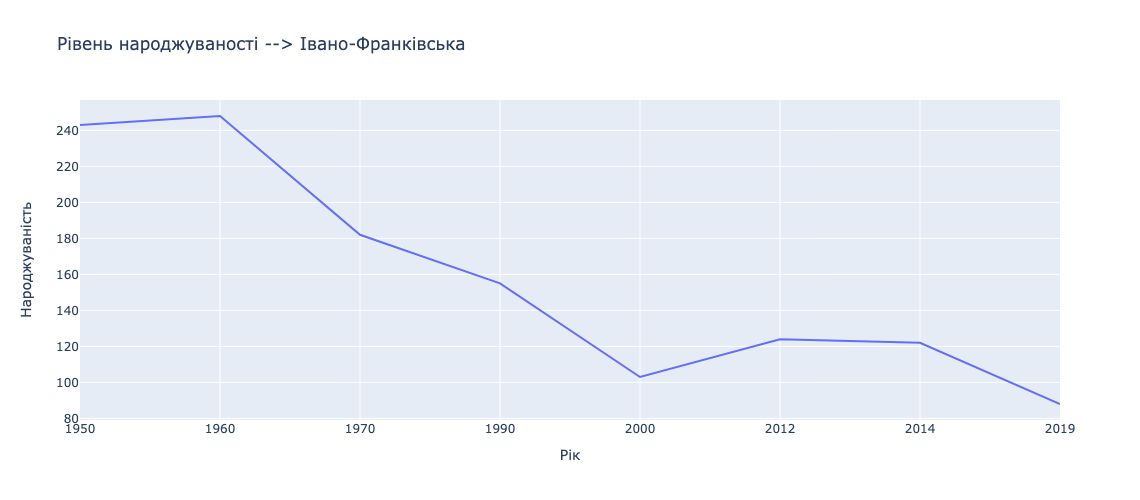

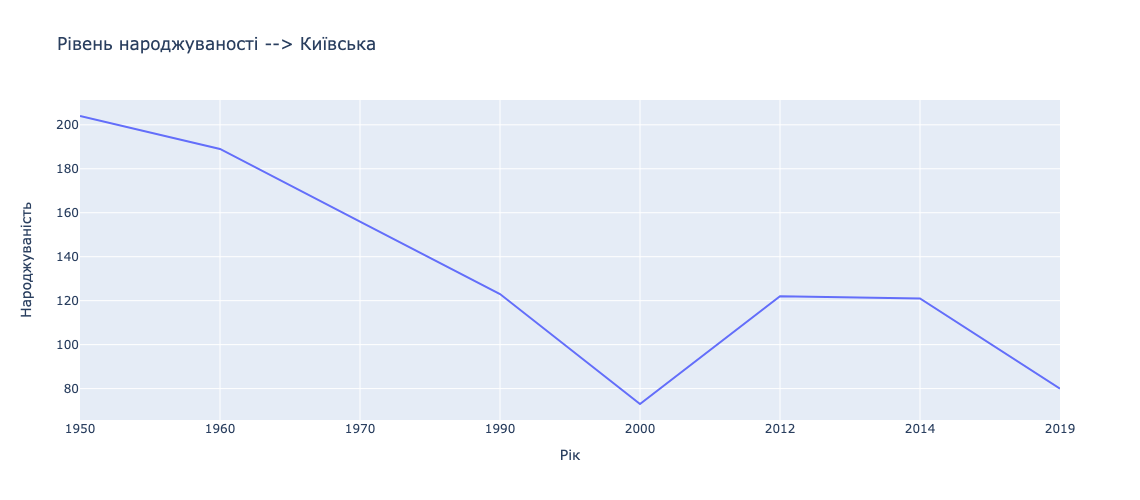

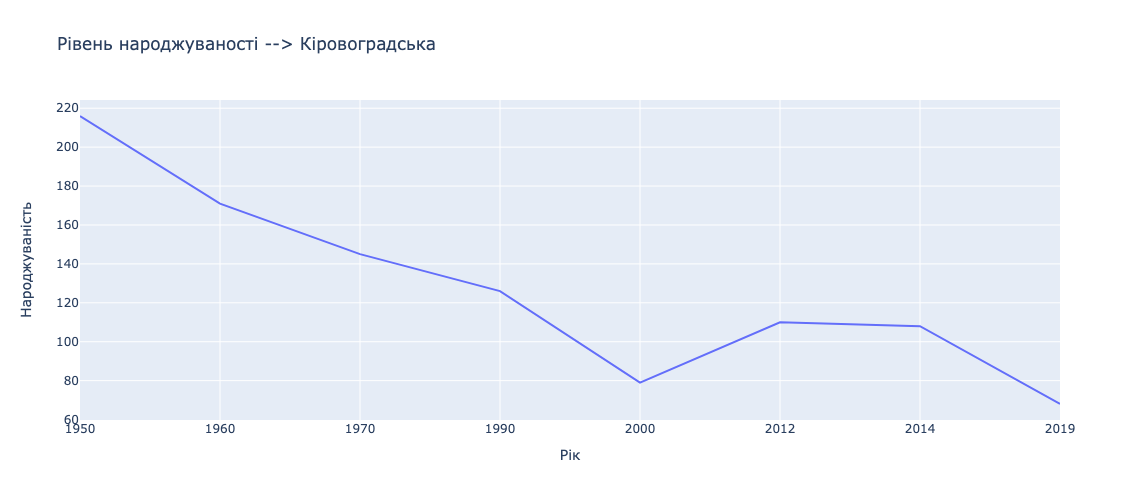

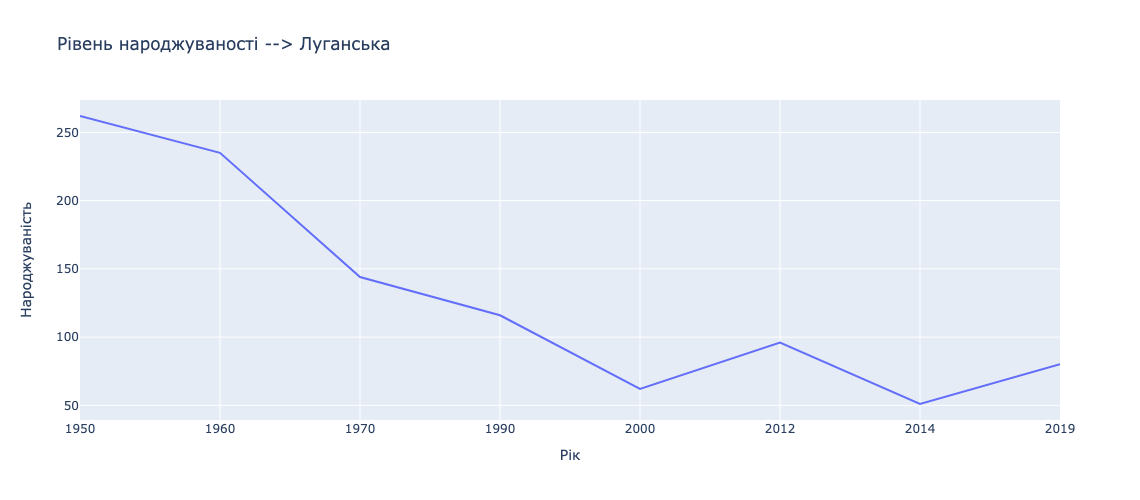

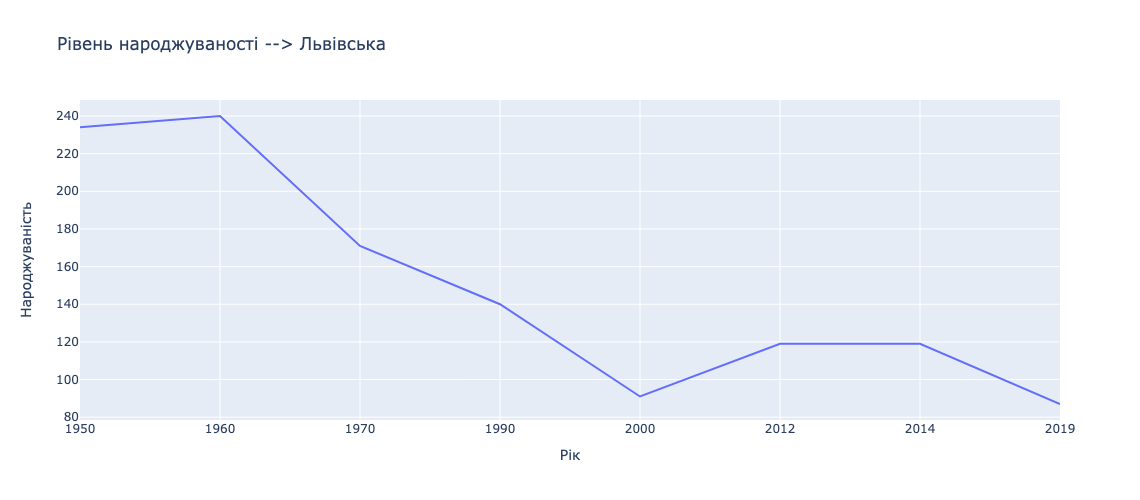

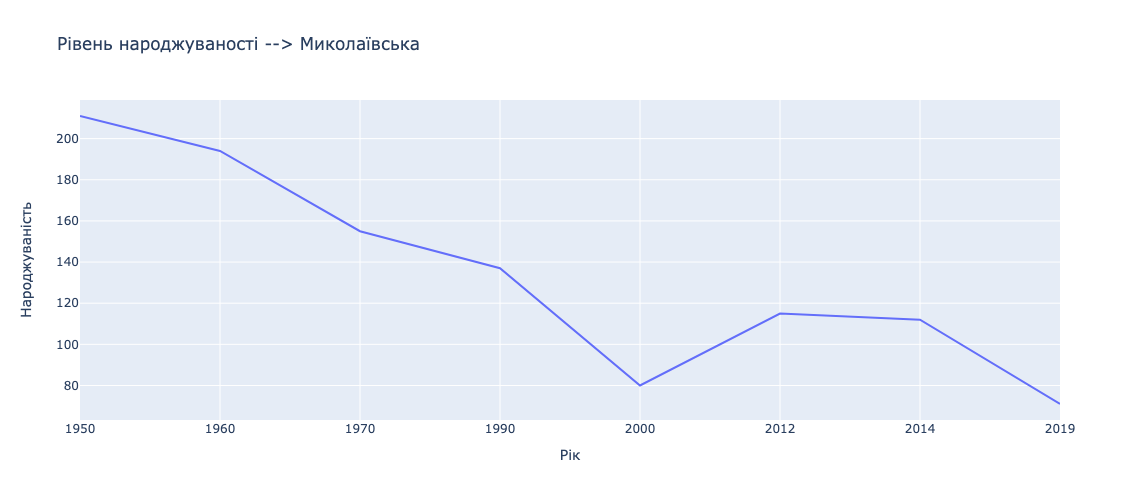

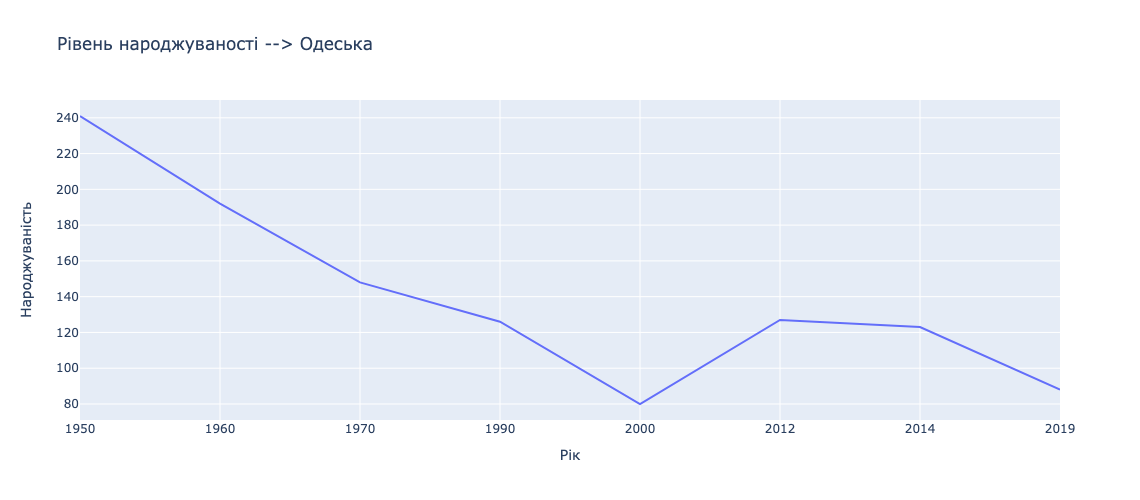

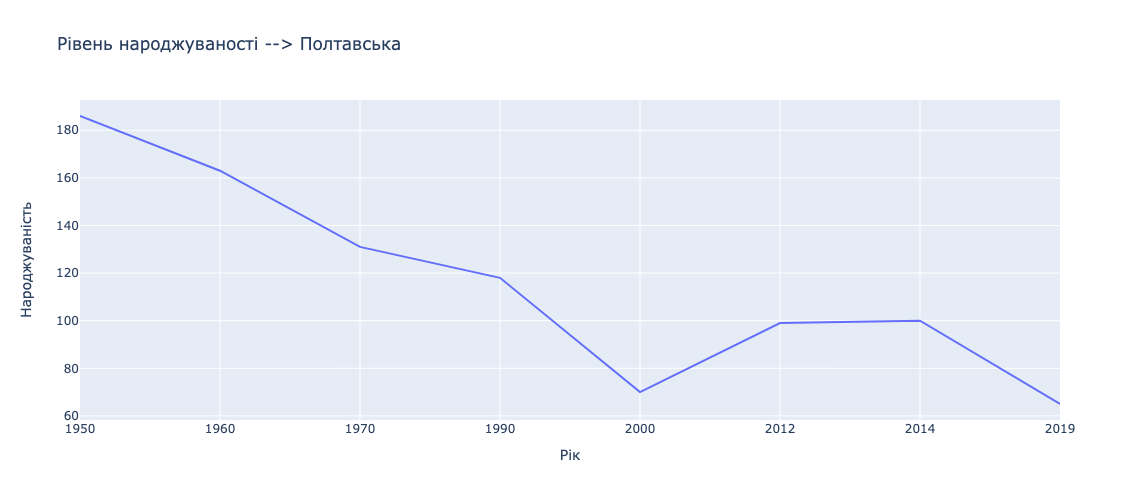

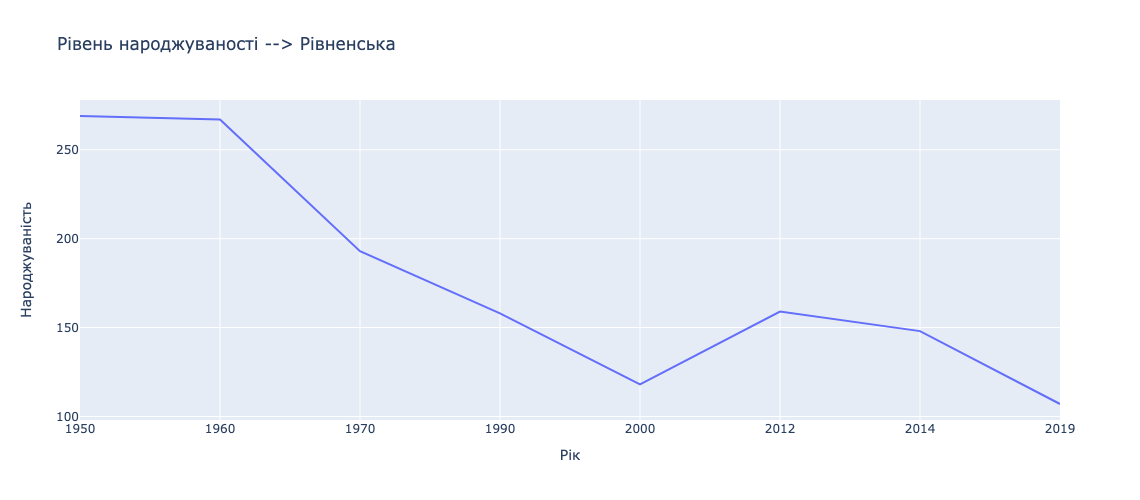

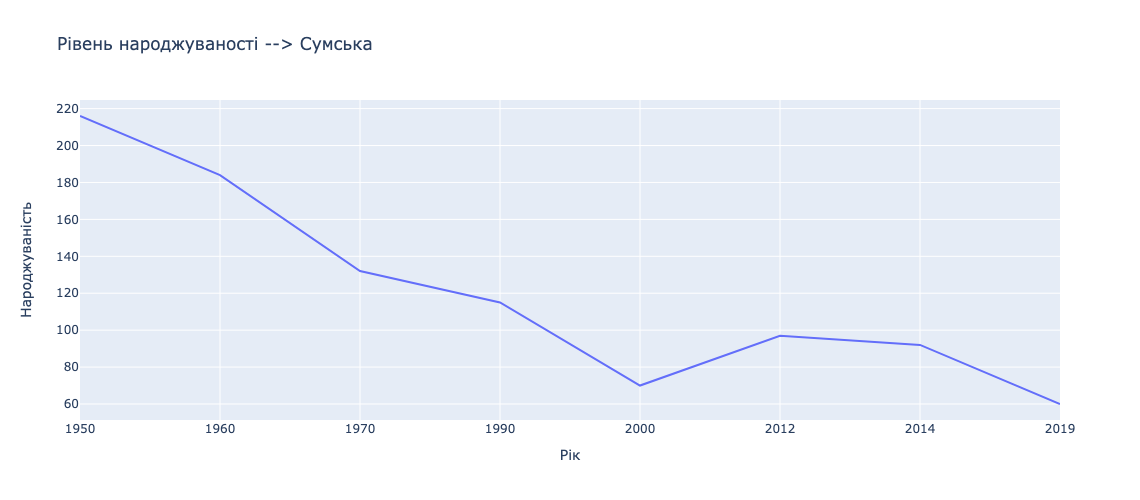

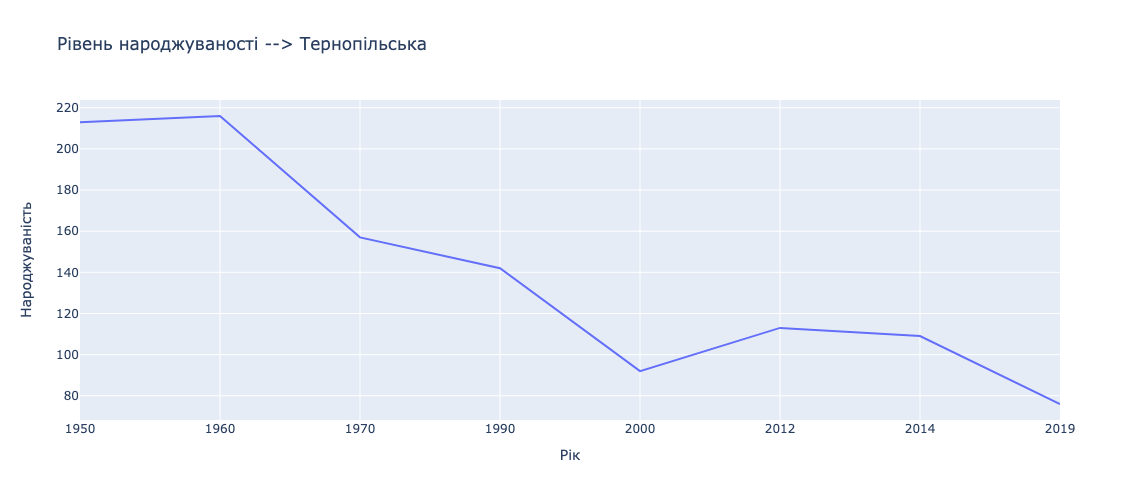

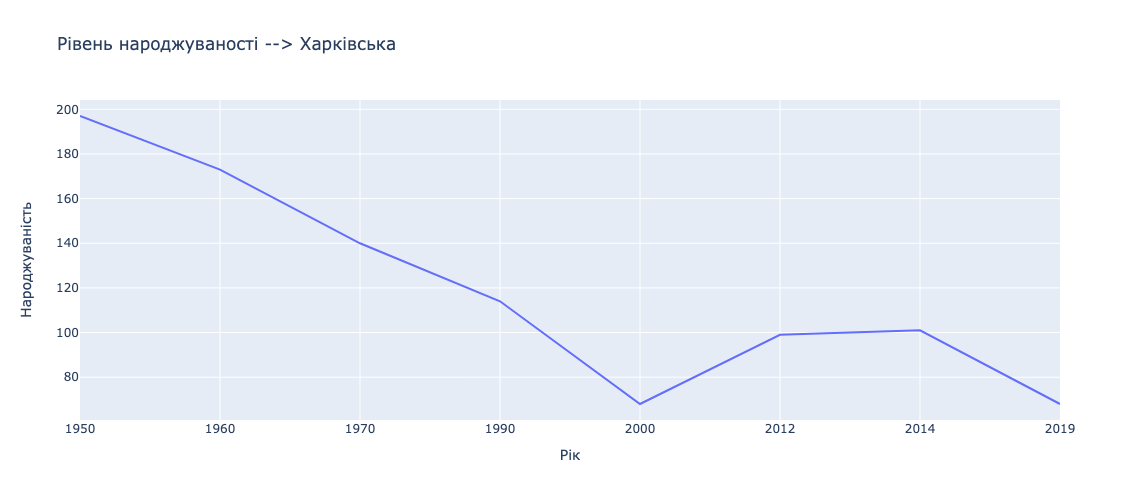

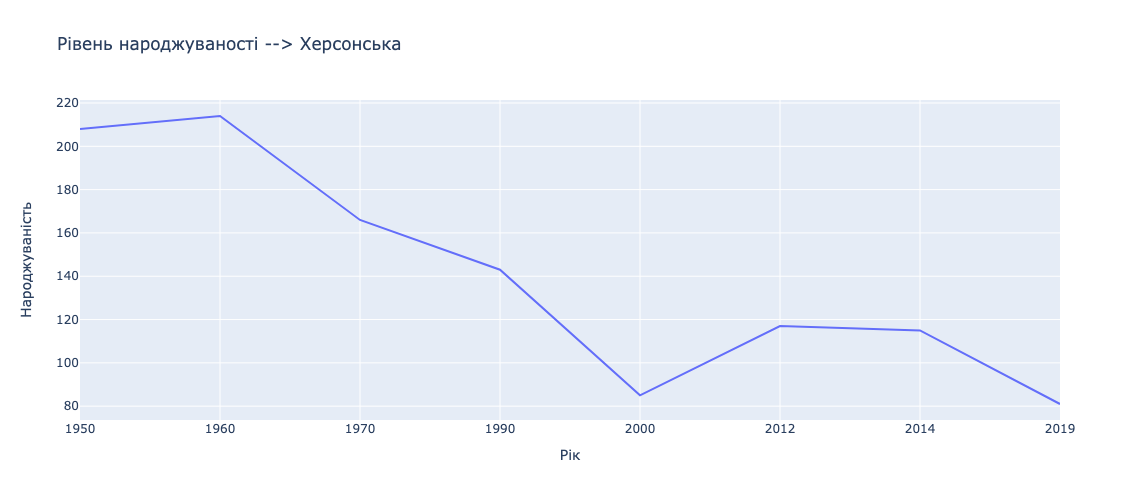

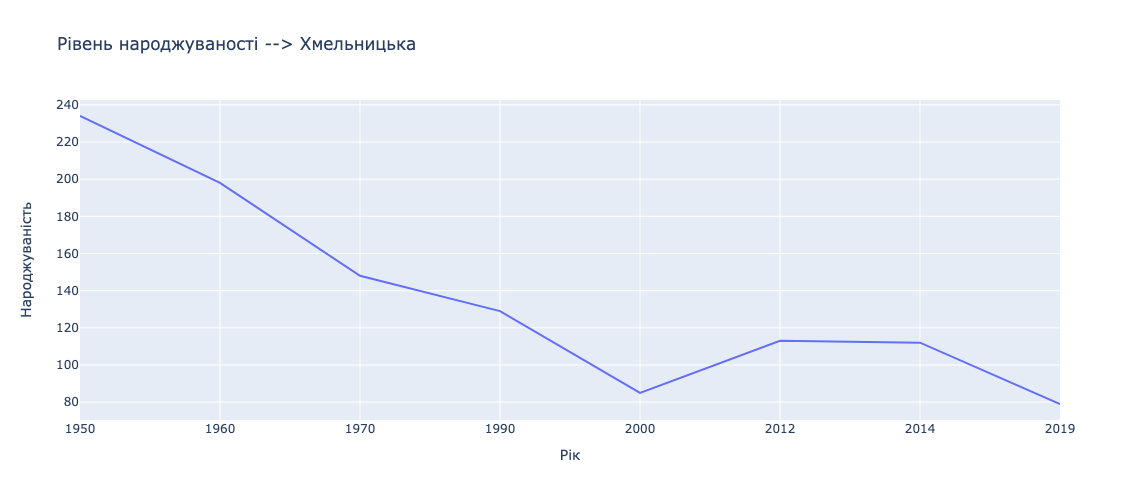

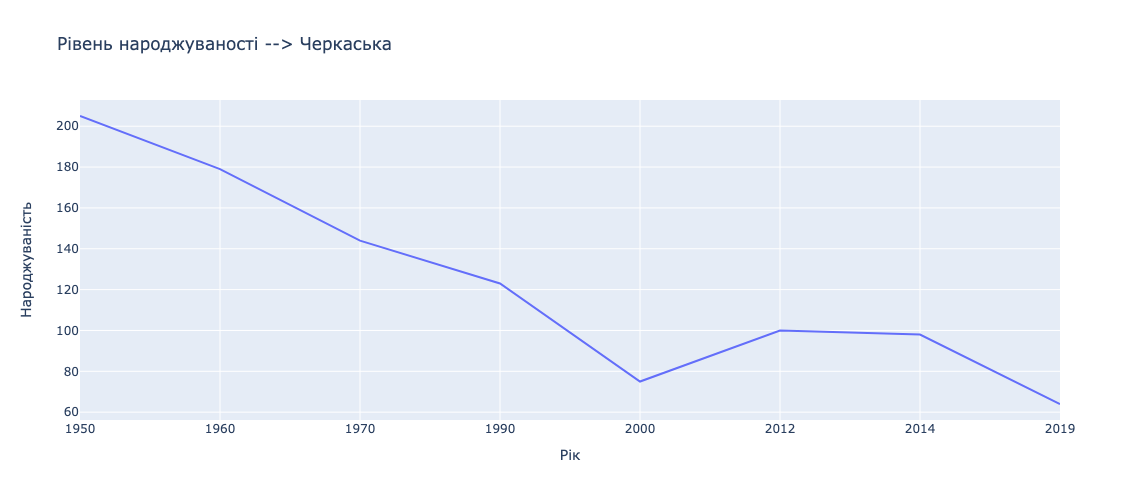

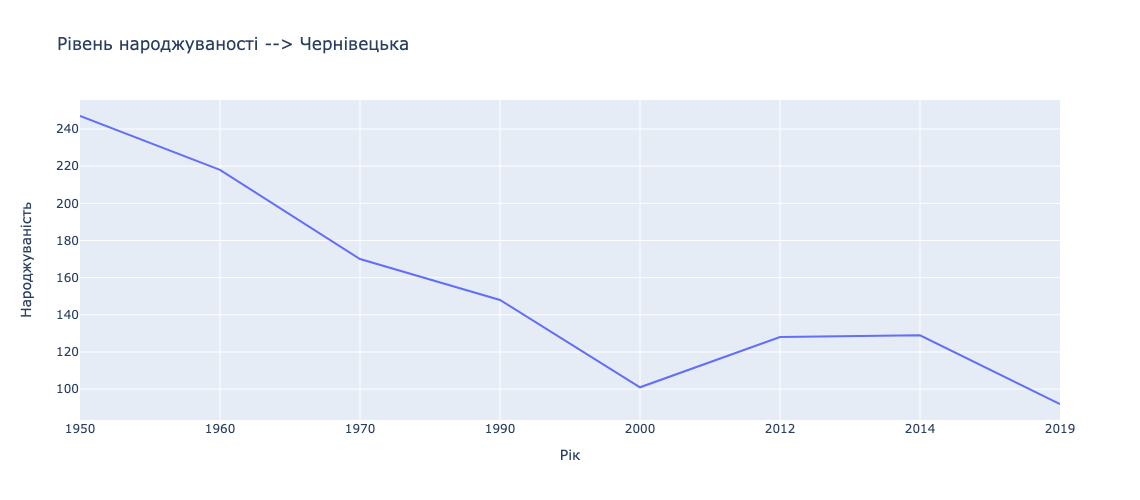

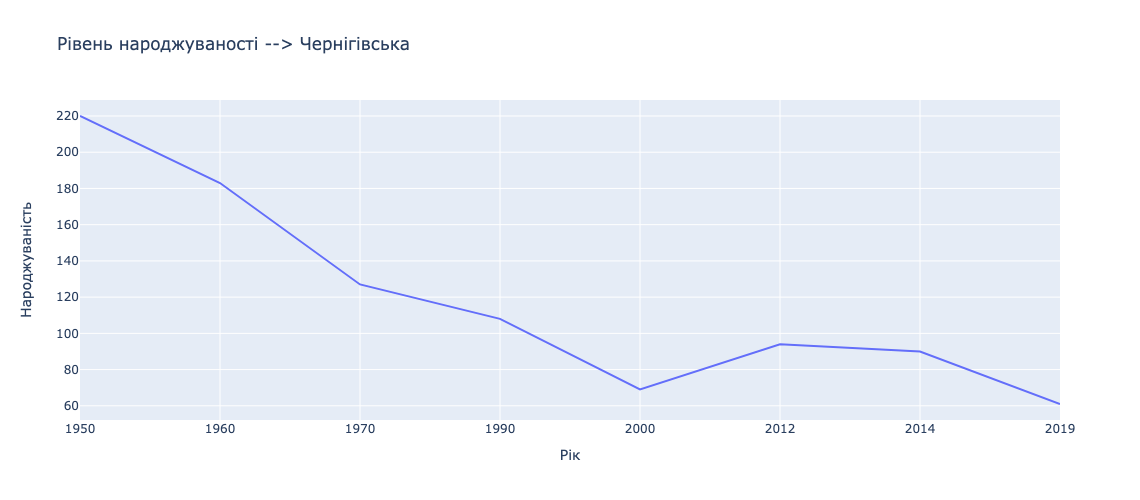

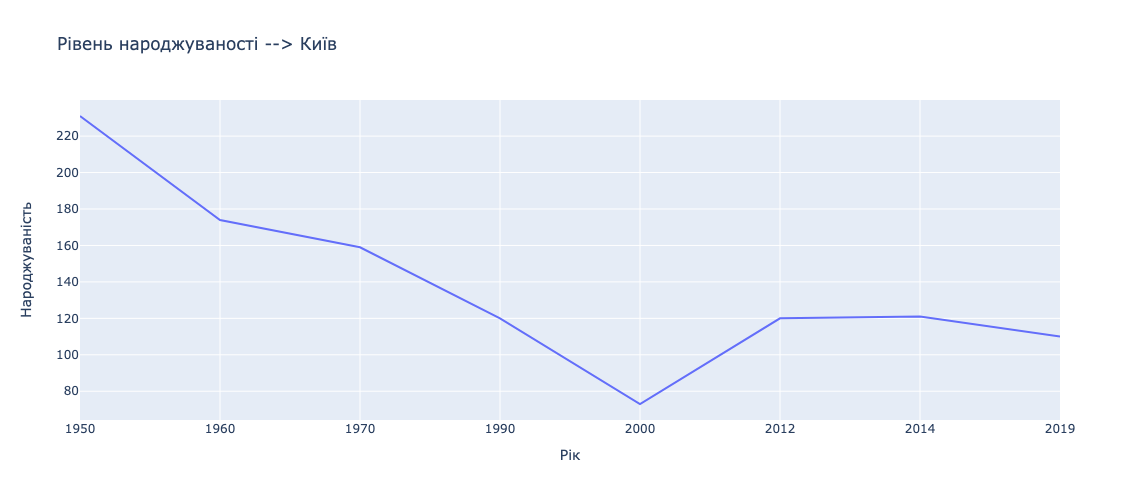

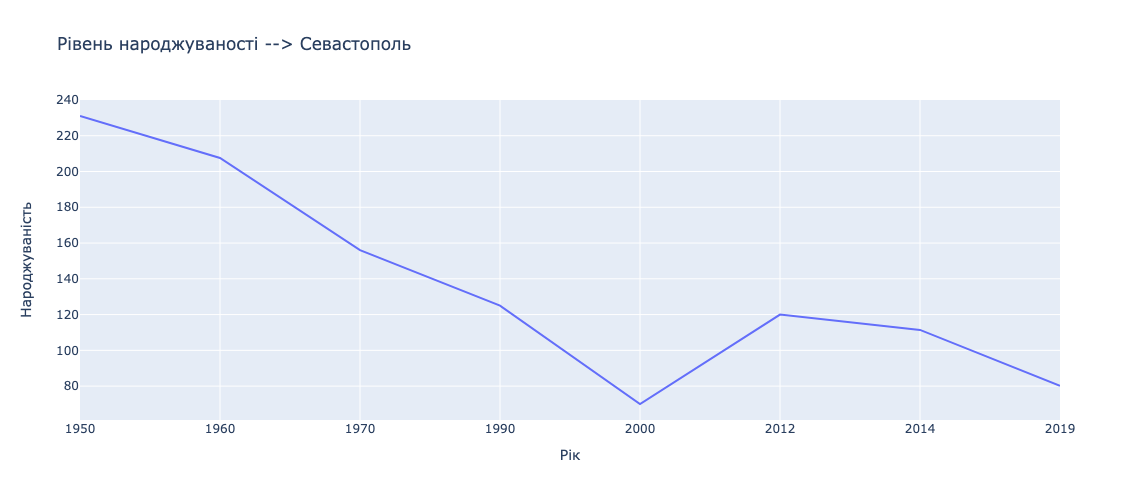

In [16]:
df_long = df.melt(id_vars=["Регіон"], var_name="Рік", value_name="Народжуваність")

# Побудувати окремий графік для кожного регіону
for region in df["Регіон"].unique():
    df_region = df_long[df_long["Регіон"] == region]
    fig = px.line(df_region, x="Рік", y="Народжуваність", title=f"Рівень народжуваності --> {region}", width=500, height=500)
    fig.show()